In [2]:
import torch
import torchvision
from torch import nn
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import numpy as np

c:\Users\Shlomi\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
BATCH_SIZE = 256

# Transform

In [4]:
mean = torch.tensor([0.485, 0.456, 0.406])
std = torch.tensor([0.229, 0.224, 0.225])

transform = transforms.Compose([
	transforms.Resize((224, 224)),
	transforms.ToTensor(),
	transforms.Normalize(mean, std)
]) 

In [5]:
dataset = torchvision.datasets.CIFAR10(root="./cifar10", train=False, download=True, transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

print(dataset)

Files already downloaded and verified
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./cifar10
    Split: Test
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=tensor([0.4850, 0.4560, 0.4060]), std=tensor([0.2290, 0.2240, 0.2250]))
           )


In [6]:
def plot_9_imgs(batch, labels):
	n = 3
	offset = 0  # We can start showing images at some offset untill (offset + n*n)

	fig, ax = plt.subplots(n, n)
	fig.tight_layout()

	for row in range(n):
		for col in range(n):
			cur_ax = ax[row, col]
			img_i = row*n + col + offset

			cur_ax.set_axis_off()
			cur_ax.set_title(str(img_i) + ": " + str(dataset.classes[labels[img_i]]))
			o = batch[img_i].numpy().transpose(1, 2, 0)
			cur_ax.imshow(o)

# Load pre-trained ResNet

In [7]:
resnet18 = torchvision.models.resnet18(pretrained=True)
resnet18.eval()

images_batch, labels_batch = next(iter(dataloader))
resnet18.fc = nn.Linear(in_features=512, out_features=10)

print(images_batch[0].shape)  # Notice 3x224x224

torch.Size([3, 224, 224])


# See how ResNet deals with CIFAR10 images BEFORE TRAINING

In [8]:
prediction = resnet18(images_batch)
softmax = nn.Softmax(dim=1)
labels_prediction = torch.max(softmax(prediction), dim=1)
print(labels_prediction.indices)

tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 5, 3, 2, 2, 2, 3, 2, 2, 5, 2, 2, 5, 2, 2, 2, 2, 2,
        3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2,
        2, 8, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 5, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Text(0.5, 0.98, 'Ground truth')

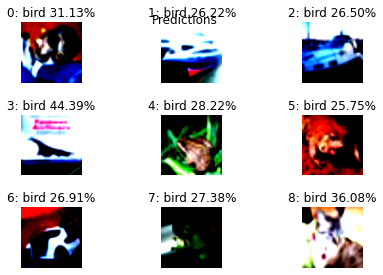

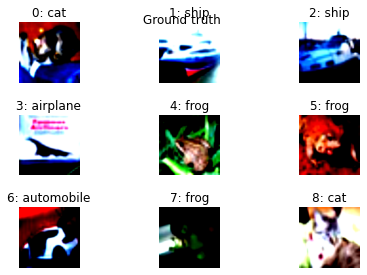

In [22]:
n = 3
fig, ax = plt.subplots(n, n)
fig.tight_layout()

for row in range(n):
	for col in range(n):
		cur_ax = ax[row, col]
		img_i = row*n + col

		label = dataset.classes[labels_prediction.indices[img_i]]

		prob = labels_prediction.values[img_i].item() * 100 # Get probability of the image being of the class
		prob = '%.2f' % prob # Show only 2 decimal places

		title = f"{img_i}: {label} {prob}%"

		cur_ax.set_axis_off()
		cur_ax.set_title(str(title))
		o = images_batch[img_i].numpy().transpose(1, 2, 0)
		cur_ax.imshow(o)

plt.suptitle("Predictions")


plot_9_imgs(images_batch, labels_batch)
plt.suptitle("Ground truth")